In [ ]:
Analyzing the sales and profit performance of a
retail store is a crucial task for businesses aiming to optimize
operations, refine pricing strategies, enhance marketing efforts, and
improve inventory management. This challenge requires leveraging
data-driven insights to identify areas for improvement and drive
revenue and growth. If you aspire to learn how to conduct a
comprehensive analysis of store sales and profits, this article
provides a guide. The task involves delving into the intricacies of
storing data, employing Python for analysis, and deriving actionable
insights for strategic decision-making.

# Data Loading

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("C:/Users/KIIT0001/OneDrive/Desktop/ShadowFox/Sample - Superstore.csv", encoding='latin1')
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# Data Cleaning and Preprocessing

In [7]:
# drop unnecesarry columns
data.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Product ID', 'Product Name'], axis=1, inplace=True)

In [8]:
data.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [11]:
# statistical analysis
data.shape

(9994, 13)

In [13]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [16]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Date     9994 non-null   object 
 2   Ship Mode     9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   City          9994 non-null   object 
 5   State         9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [18]:
# convert dates from object datatype to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Date     9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   City          9994 non-null   object        
 5   State         9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Category      9994 non-null   object        
 8   Sub-Category  9994 non-null   object        
 9   Sales         9994 non-null   float64       
 10  Quantity      9994 non-null   int64         
 11  Discount      9994 non-null   float64       
 12  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 1015.1+ KB


In [20]:
# check for null values
data.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# EDA

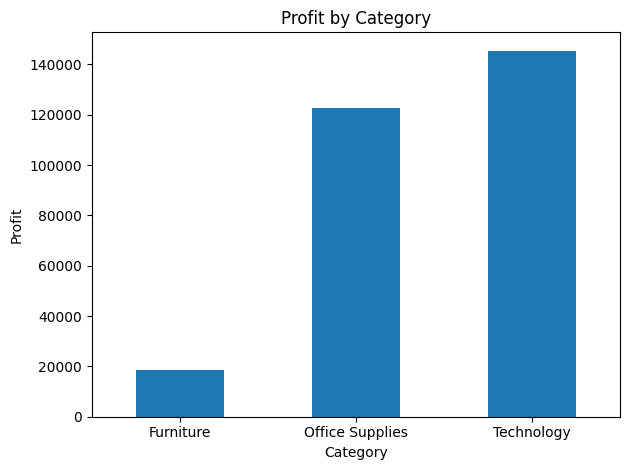

In [27]:
# product category analysis
category_profit = data.groupby('Category')['Profit'].sum()
ax = category_profit.plot(kind='bar', title='Profit by Category')


plt.xticks(rotation=0)
plt.xlabel("Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Sales by Region'}, ylabel='Sales'>

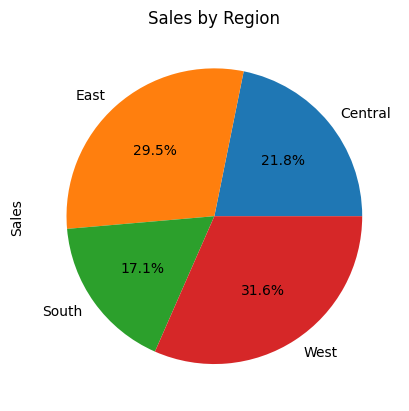

In [22]:
# regional performance 
region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Region')

<Axes: xlabel='Discount', ylabel='Profit'>

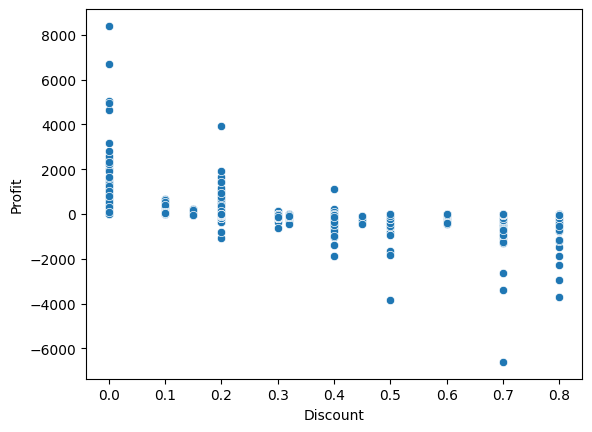

In [28]:
# discount vs. profit relationship
sns.scatterplot(x='Discount', y='Profit', data=data)

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Order Date'>

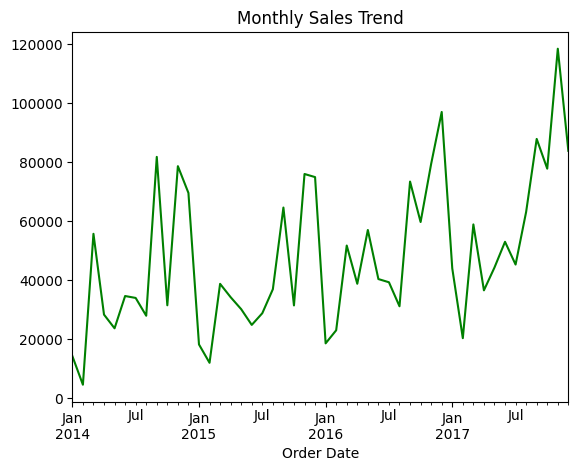

In [32]:
# sales trend by time series
monthly_sales = data.set_index('Order Date').resample('ME')['Sales'].sum()
monthly_sales.plot(title='Monthly Sales Trend',color='green')

<Axes: title={'center': 'Top Cities by Profit'}, ylabel='City'>

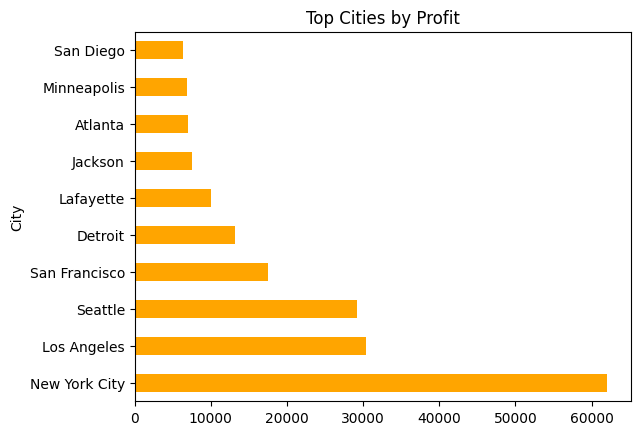

In [34]:
# top cities by profit
top_cities = data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='barh', title='Top Cities by Profit',color='orange')

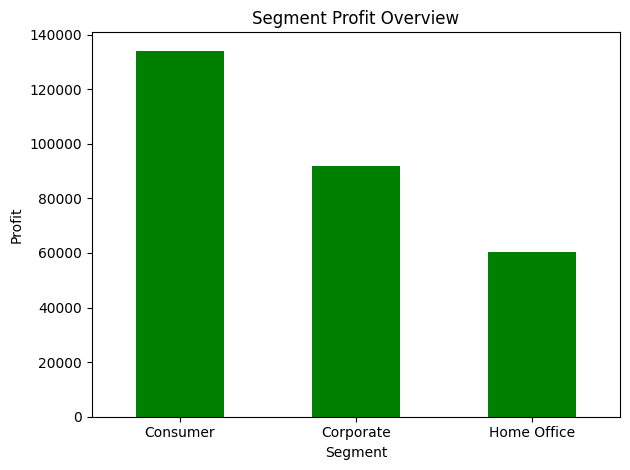

In [39]:
# loss making segments 
loss_segments = data.groupby(['Segment'])['Profit'].sum()
loss_segments.plot(kind='bar', title='Segment Profit Overview',color='green')

plt.xticks(rotation=0)
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_22432\687120174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Ship Mode', y='Profit', data=data, palette='coolwarm',legend=False)


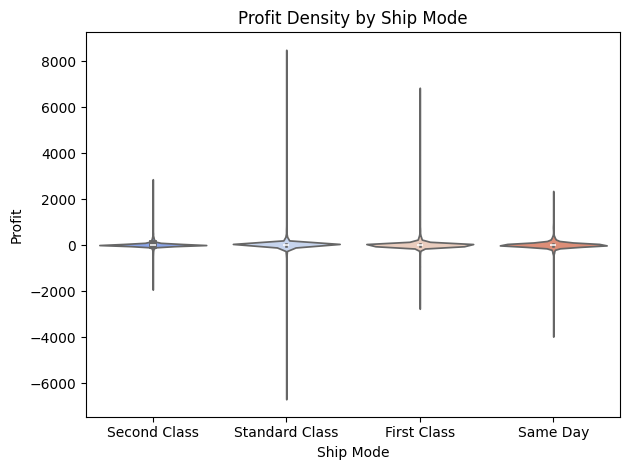

In [64]:
# ship mode efficiency
sns.violinplot(x='Ship Mode', y='Profit', data=data, palette='coolwarm',legend=False)
plt.title('Profit Density by Ship Mode')
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

# Insights

In [47]:
# grouping and summarizing by Category
category_analysis = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_analysis['Profit Margin (%)'] = (category_analysis['Profit'] / category_analysis['Sales']) * 100
print("\nCategory-wise Performance:\n", category_analysis.sort_values('Profit Margin (%)', ascending=False))


Category-wise Performance:
           Category        Sales       Profit  Profit Margin (%)
2       Technology  836154.0330  145454.9481          17.395712
1  Office Supplies  719047.0320  122490.8008          17.035158
0        Furniture  741999.7953   18451.2728           2.486695


In [52]:
# identifying city-wise top and bottom performers
city_profit = data.groupby('City')['Profit'].sum().sort_values(ascending=False)
print("\nTop Profitable Cities:\n\n", city_profit.head(5))
print("\nLeast Profitable Cities:\n\n", city_profit.tail(5))


Top Profitable Cities:

 City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

Least Profitable Cities:

 City
Chicago         -6654.5688
Lancaster       -7239.0684
San Antonio     -7299.0502
Houston        -10153.5485
Philadelphia   -13837.7674
Name: Profit, dtype: float64


In [53]:
# evaluating impact of discount levels
discount_bins = pd.cut(data['Discount'], bins=[0, 0.2, 0.4, 0.6, 1.0])
discount_impact = data.groupby(discount_bins, observed=False)['Profit'].mean().reset_index()
discount_impact.columns = ['Discount Range', 'Avg Profit']
print("\nProfit vs Discount Level:\n\n", discount_impact)


Profit vs Discount Level:

   Discount Range  Avg Profit
0     (0.0, 0.2]   26.501571
1     (0.2, 0.4]  -77.864055
2     (0.4, 0.6] -134.624160
3     (0.6, 1.0]  -98.348741


In [54]:
# segment analysis
segment_perf = data.groupby('Segment')['Profit'].sum().reset_index()
print("\nSegment-wise Profit:\n\n", segment_perf)


Segment-wise Profit:

        Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785


# Recommendations

In [55]:
recommendations = []

# tech dominates category performance
if category_analysis.loc[category_analysis['Profit Margin (%)'].idxmax(), 'Category'] == 'Technology':
    recommendations.append("Focus marketing and inventory on Technology products for higher returns.")

In [56]:
# discounting trends
if discount_impact['Avg Profit'].min() < 0:
    recommendations.append("Reassess discounting policy for items receiving over 40% discount.")

In [57]:
# shipping cost-efficiency
ship_mode_perf = data.groupby('Ship Mode')['Profit'].mean().reset_index()
if ship_mode_perf['Profit'].max() > ship_mode_perf['Profit'].min():
    top_mode = ship_mode_perf.loc[ship_mode_perf['Profit'].idxmax(), 'Ship Mode']
    recommendations.append(f"Encourage usage of {top_mode} shipping to maintain healthy profit margins.")

In [58]:
# segment recommendation
lowest_segment = segment_perf.loc[segment_perf['Profit'].idxmin(), 'Segment']
recommendations.append(f"Refine sales strategy for the '{lowest_segment}' segment to boost performance.")

print("\nStrategy Suggestions:\n")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


Strategy Suggestions:

1. Focus marketing and inventory on Technology products for higher returns.
2. Reassess discounting policy for items receiving over 40% discount.
3. Encourage usage of First Class shipping to maintain healthy profit margins.
4. Refine sales strategy for the 'Home Office' segment to boost performance.


In [ ]:
---------------------------------------------------------------------END-------------------------------------------------------------------------------